In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
df_schemes = pd.read_excel('/Users/AribM/Desktop/Mutual Funds India-Data Analysis/processed_data.xlsx')
# Filtering out Bad performing funds from the df and storing the rest in new df
df_filtered = df_schemes[
    (df_schemes['Estimated_Beta'].between(-5,5)) &   # Remove extremely volatile funds
    (df_schemes['Sharpe_annual'] > 0) &               # Keep funds with positive Sharpe
    (df_schemes['Sortino_Ratio'] > 0)                # Keep funds with decent risk-adjusted returns
]
df_hybrid = df_schemes[df_schemes['Scheme_Category'].str.contains("Hybrid",na=False)]
df_hybrid = df_hybrid.drop(['Estimated_Beta','alpha'],axis=1) # Beta,Alpha not required for further analysis

In [2]:
# We have the same funds with different options like regular, direct, growth, idcw etc., and so filtering the option with best CAGR for analysis
df_hybrid = df_hybrid.sort_values('CAGR', ascending=False).drop_duplicates(
    subset=['Fund_House', 'Scheme_Type', 'Scheme_Category'], keep='first'
)

In [3]:
# Determining the average returns for hybrid funds:
hybrid_avg_cagr = df_hybrid['CAGR'].mean()
print(hybrid_avg_cagr)

12.552837837837837


In [4]:
# Best Hybrid Funds for Investors who already have high risk equity schemes in portfolio
# For these investors the volatility should be low and return should be atleast the avg. of hybrid funds
df_hyb_1 = df_hybrid[(df_hybrid['std_dev'] <= 1) &
                      (df_hybrid['CAGR'] >= 12.5) &
                      (df_hybrid['Sortino_Ratio'] > 0) &
                      (df_hybrid['Sharpe_annual'] > 0)]
df_hyb_1 = df_hyb_1.sort_values(by='std_dev',ascending=True)
df_hyb_1.head() # Displaying a few funds

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,std_dev,active_years,CAGR,Sortino_Ratio,Sharpe_annual
1190,Nippon India Mutual Fund,Open Ended Schemes,Hybrid Scheme - Multi Asset Allocation,148458,NIPPON INDIA MULTI ASSET FUND - DIRECT Plan - ...,0.570,3,17.360,1.403886,1.838945
1235,Union Mutual Fund,Open Ended Schemes,Hybrid Scheme - Aggressive Hybrid Fund,148592,Union Hybrid Equity Fund - Direct Plan - Growt...,0.679,3,14.649,0.973871,1.339140
954,Baroda BNP Paribas Mutual Fund,Open Ended Schemes,Hybrid Scheme - Dynamic Asset Allocation or Ba...,145396,Baroda BNP Paribas Balanced Advantage Fund-Dir...,0.710,5,15.582,1.040826,1.360816
1166,Tata Mutual Fund,Open Ended Schemes,Hybrid Scheme - Multi Asset Allocation,148052,Tata Multi Asset Opportnities Fund-Direct Plan...,0.744,3,22.527,1.501410,1.808495
253,Canara Robeco Mutual Fund,Open Ended Schemes,Hybrid Scheme - Aggressive Hybrid Fund,118272,CANARA ROBECO EQUITY HYBRID FUND - DIRECT PLAN...,0.818,5,13.796,0.795636,1.079539


From these funds the investor can decide the most suitable funds on the basis of his/her investment goals and portfolio

In [5]:
# For conservative investors who have mostly safe and non volatile funds in portfolio should go for hybrid funds with relatively high risk and high return for balance, since anyway hyb funds are less volatile than equity ones
df_hyb_2 = df_hybrid[(df_hybrid['Sortino_Ratio'] > 0 )&
                     (df_hybrid['Sharpe_annual'] > 0) ]
df_hyb_2 = df_hyb_2.sort_values(by='CAGR',ascending=False).head()
df_hyb_2

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,std_dev,active_years,CAGR,Sortino_Ratio,Sharpe_annual
547,quant Mutual Fund,Open Ended Schemes,Hybrid Scheme - Multi Asset Allocation,120820,quant Multi Asset Fund - IDCW Option - Direct ...,0.934,5,23.322,1.274753,1.520550
1166,Tata Mutual Fund,Open Ended Schemes,Hybrid Scheme - Multi Asset Allocation,148052,Tata Multi Asset Opportnities Fund-Direct Plan...,0.744,3,22.527,1.501410,1.808495
546,quant Mutual Fund,Open Ended Schemes,Hybrid Scheme - Aggressive Hybrid Fund,120819,quant Absolute Fund-Growth Option-Direct Plan,0.983,5,21.232,1.119773,1.336799
1065,Mahindra Manulife Mutual Fund,Open Ended Schemes,Hybrid Scheme - Aggressive Hybrid Fund,147446,Mahindra Manulife Aggressive Hybrid Fund - Dir...,0.849,4,20.181,1.179857,1.456756
1190,Nippon India Mutual Fund,Open Ended Schemes,Hybrid Scheme - Multi Asset Allocation,148458,NIPPON INDIA MULTI ASSET FUND - DIRECT Plan - ...,0.570,3,17.360,1.403886,1.838945


These are some funds that can considered for the conservative investors with safe portfolios

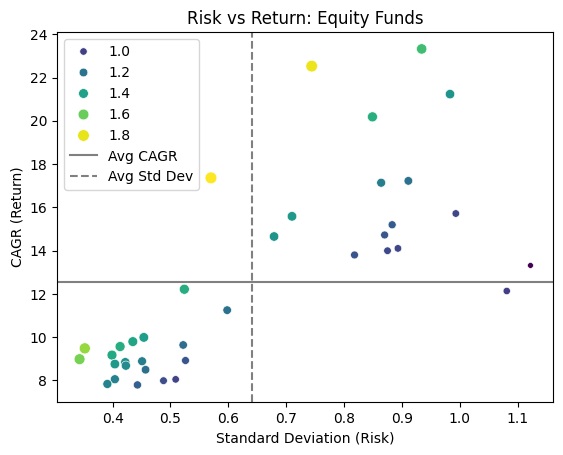

In [8]:
# Visualizing the Return Vs Volatility of Hybrid Schemes:
sns.scatterplot(data=df_hybrid,x='std_dev',y='CAGR',size='Sharpe_annual',hue='Sharpe_annual',palette='viridis')
plt.axhline(df_hybrid['CAGR'].mean(), linestyle='solid', color='gray', label="Avg CAGR")
plt.axvline(df_hybrid['std_dev'].mean(), linestyle='dashed', color='gray', label="Avg Std Dev")
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("CAGR (Return)")
plt.title("Risk vs Return: Equity Funds")
plt.legend()
plt.show()

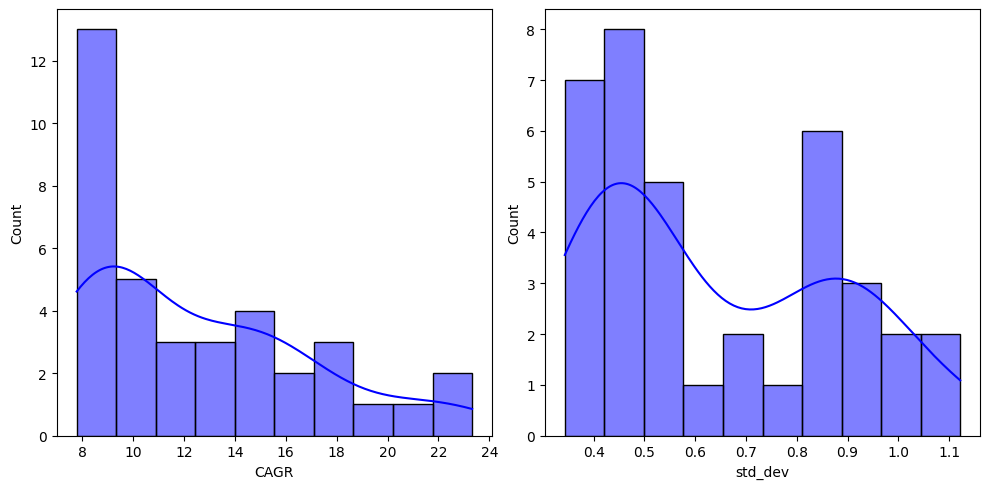

In [21]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=df_hybrid['CAGR'],bins=10,kde=True,color='blue',ax=ax[0])
sns.histplot(data=df_hybrid['std_dev'],bins=10,kde=True,color='blue',ax=ax[1])
fig.tight_layout()